In [7]:
from gensim.models import Word2Vec
import pandas as pd
import torch
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [8]:
data_folder = './dataset/'

original_data = pd.read_csv(data_folder + 'dataset.csv')
dataset = []

for index, row in original_data.iterrows():

    heroes = row
    dataset.append(heroes) 

dataset = np.array(dataset)

print(dataset.shape)


(145, 11)


In [9]:
lineup = dataset[:, :-1]
result = dataset[:, -1]


In [10]:
sentences1 = lineup[:, 0:5]
sentences2 = lineup[:, 5:]

sentences = np.concatenate((sentences1, sentences2), axis=0)

In [11]:
unique_heroes = np.unique(sentences)
unique_heroes = unique_heroes.tolist()
print(unique_heroes)
print(len(unique_heroes))

['上官婉儿', '不知火舞', '亚连', '元坦', '元法', '公孙离', '兰陵王', '关羽', '典韦', '刘邦', '司空震', '后羿', '吕布', '哪吒', '墨子', '夏侯惇', '夏洛特', '大乔', '大司命', '太乙真人', '女娲', '妲己', '姜子牙', '姬小满', '嬴政', '孙尚香', '孙策', '孙膑', '安琪拉', '少司缘', '干将莫邪', '廉颇', '弈星', '张良', '张飞', '影', '戈娅', '敖隐', '明世隐', '暃', '曹操', '朵莉亚', '李元芳', '李白', '杨戬', '杨玉环', '桑启', '梦奇', '武则天', '沈梦溪', '海月', '海诺', '澜', '牛魔', '狂铁', '狄仁杰', '猪八戒', '王昭君', '甄姬', '百里守约', '老夫子', '芈月', '花木兰', '苏烈', '蒙恬', '蒙犽', '蔡文姬', '虞姬', '裴擒虎', '西施', '貂蝉', '达摩', '钟馗', '铠', '镜', '阿古朵', '露娜', '韩信', '马可波罗', '马超', '鲁班七号', '鲁班大师', '黄忠']
83


In [12]:
model = Word2Vec(sentences.tolist(), vector_size=16, window=4, min_count=1, workers=4, epochs=500)

sims = model.wv.most_similar('夏洛特', topn=5)
print(sims)

[('姬小满', 0.8666529655456543), ('达摩', 0.8513287901878357), ('曹操', 0.8185994625091553), ('狂铁', 0.7852017283439636), ('关羽', 0.7724241018295288)]


In [13]:
hero_vectors = []
for hero in unique_heroes:
    hero_vectors.append(model.wv[hero])

hero_vectors = np.array(hero_vectors)
hero_vectors.shape

(83, 16)

In [14]:
pca = PCA(n_components=2)  
reduced_vectors = pca.fit_transform(hero_vectors)

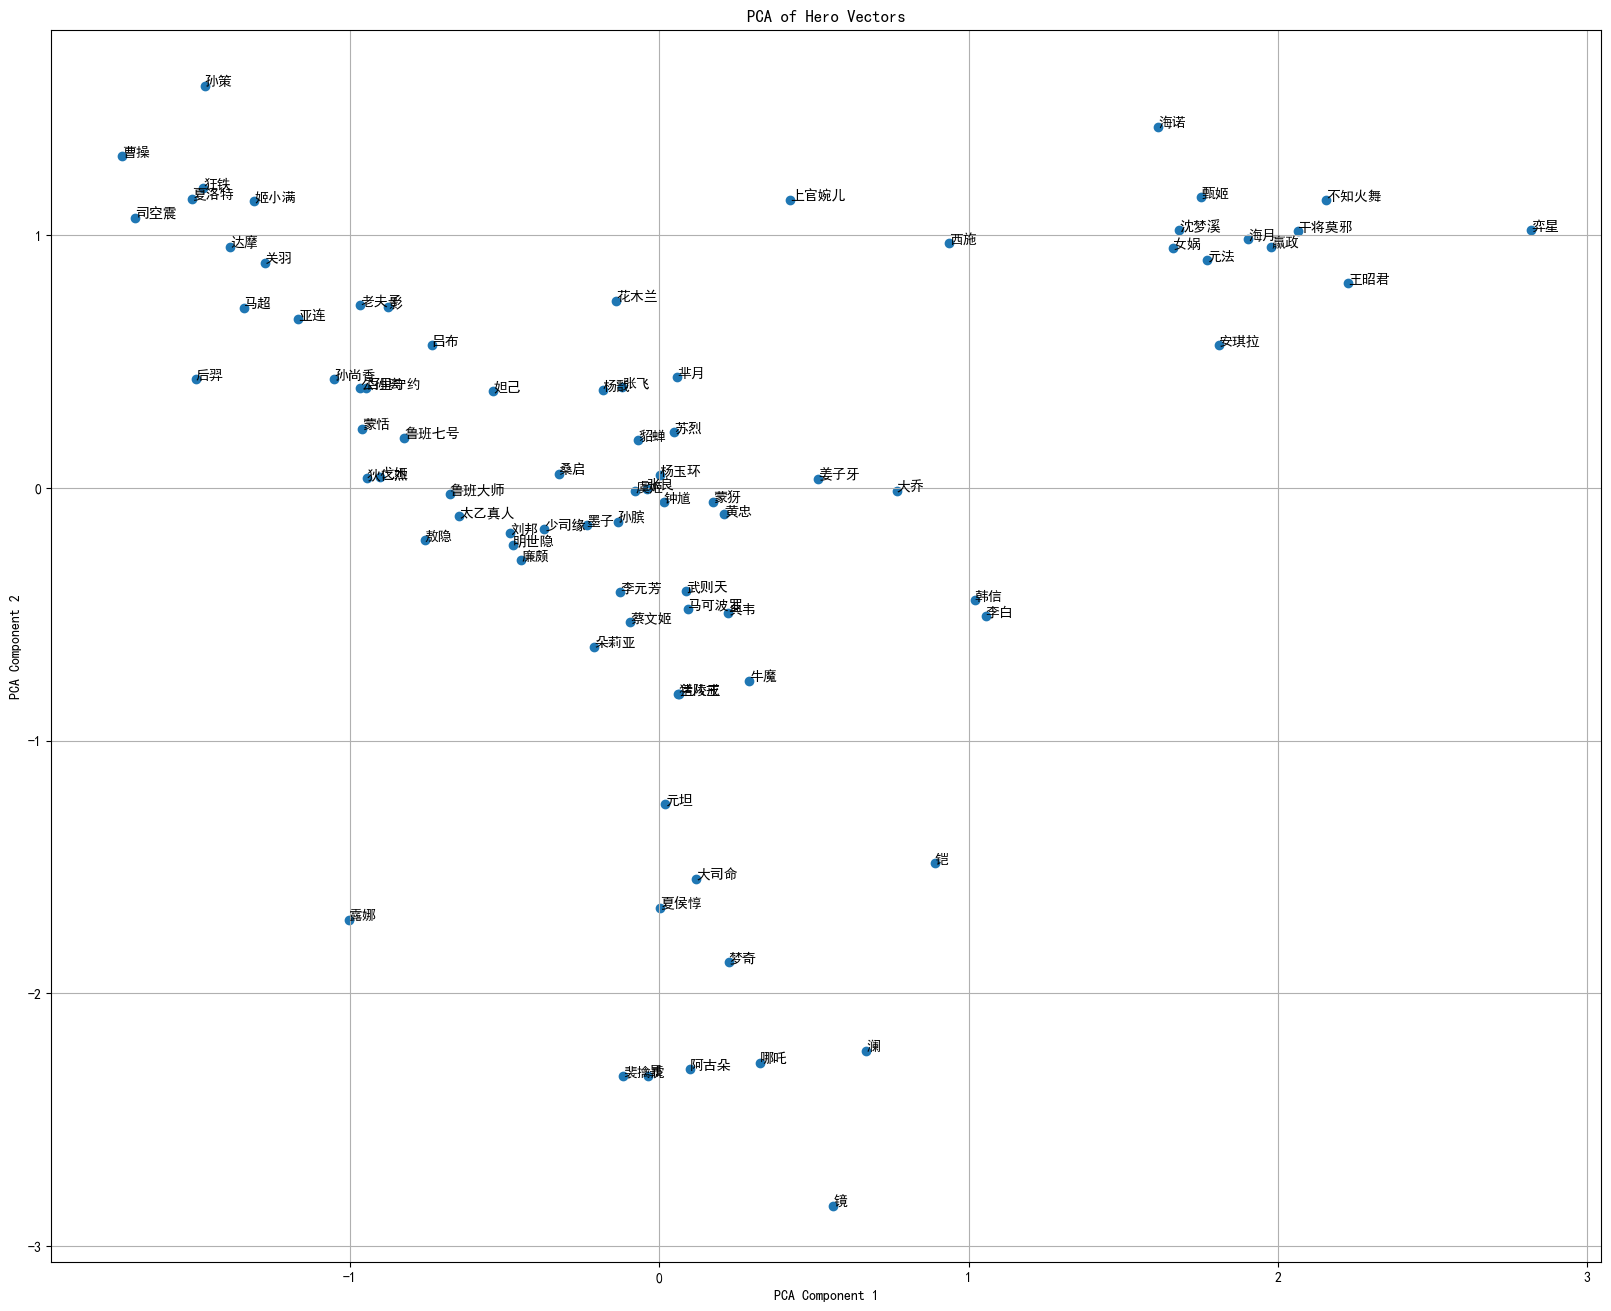

In [15]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 16))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, hero in enumerate(unique_heroes):
    plt.annotate(hero, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("PCA of Hero Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()